In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('UberDataset.csv')
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [4]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [5]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [6]:
df.shape

(1156, 7)

## Data Cleaning and Transformation

In [7]:
df.isna().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [8]:
df['PURPOSE'] = df['PURPOSE'].fillna("NOT")

In [9]:
df.dropna(axis = 0, inplace=True)

In [10]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], format='mixed')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], format='mixed')

In [11]:
df['CATEGORY'] = df['CATEGORY'].astype('category')

In [12]:
df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY            category
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

In [13]:
df.isna().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [14]:
from datetime import datetime

df['date'] = pd.DatetimeIndex(df['START_DATE']).date
df['time'] = pd.DatetimeIndex(df['START_DATE']).hour
df['month_name'] = pd.to_datetime(df['START_DATE']).dt.month_name()
df['weekday_name'] = pd.to_datetime(df['START_DATE']).dt.day_name()

#changing into categories of day and night
df['day-night'] = pd.cut(x=df['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])

## Exploratory Data Analysis

In [15]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,month_name,weekday_name,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21,January,Friday,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1,January,Saturday,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20,January,Saturday,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17,January,Tuesday,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14,January,Wednesday,Afternoon


#### What are the most common purposes for Uber rides ?

C:\Users\gpiska\AppData\Local\Temp\ipykernel_5136\2875318281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='PURPOSE', palette='viridis', legend=False)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'NOT'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

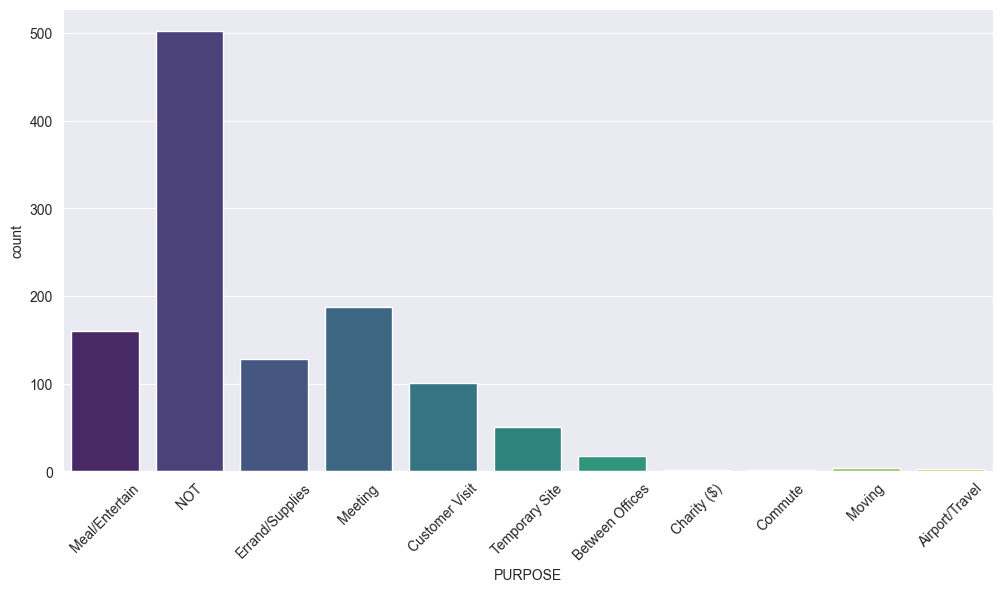

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='PURPOSE', palette='viridis', legend=False)
plt.xticks(rotation=45)

***Top Purpose: The most frequent category is labeled "NOT", which likely represents uncategorized or unspecified ride purposes.***

***Common Business-Related Uses: High counts are observed for Meals/Entertainment, Errands/Supplies, Meetings, Customer Visits, and Temporary Sites, indicating strong usage for professional and logistical needs.***

***Less Frequent Purposes: Categories like Commute, Airport/Travel, Moving, Charity ($), and Between Offices are less common.***

#### How does ride frequency vary across different times of the day ?

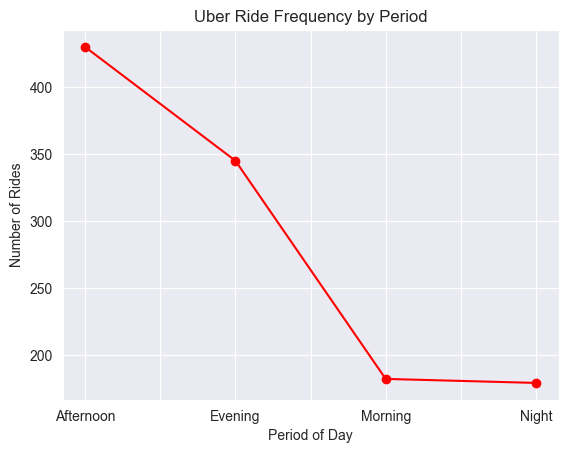

In [17]:
df['day-night'].value_counts().plot(kind="line", marker='o', linestyle='-', color='red')
plt.title('Uber Ride Frequency by Period')
plt.xlabel('Period of Day')
plt.ylabel('Number of Rides')
plt.grid(True)

***This trend suggests that Uber usage is most common in the Afternoon, likely due to business activities, errands, or social engagements, with demand tapering off in the Morning and Night.***

#### Are there any noticeable trends in ride purposes over the months or seasons?

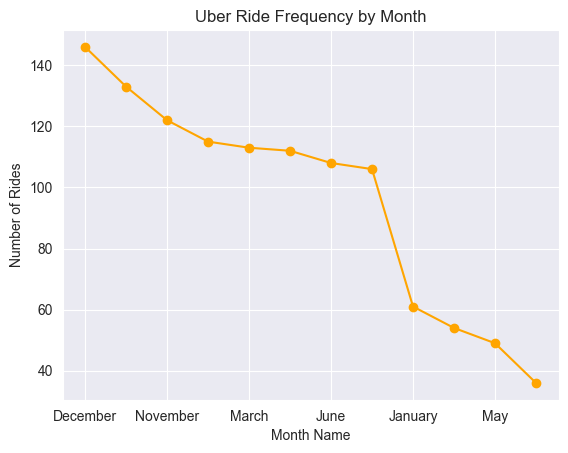

In [18]:
df['month_name'].value_counts().plot(kind="line", marker='o', linestyle='-', color='orange')
plt.title('Uber Ride Frequency by Month')
plt.xlabel('Month Name')
plt.ylabel('Number of Rides')
plt.grid(True)

#### Which start locations are the most frequently used?

Text(0, 0.5, 'Number of Rides')

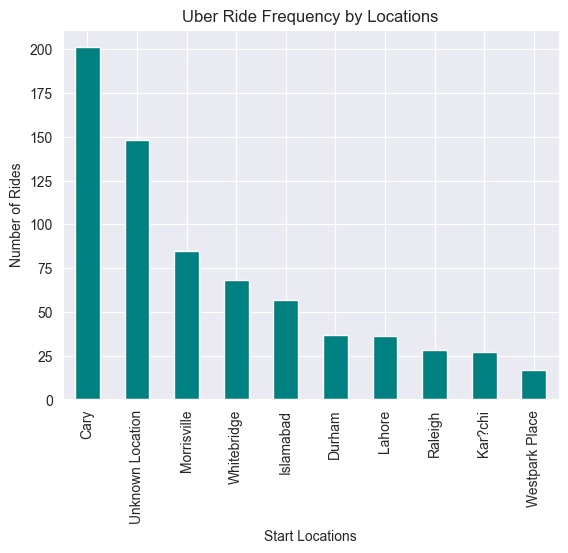

In [19]:
df['START'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', color='teal')
plt.title('Uber Ride Frequency by Locations')
plt.xlabel('Start Locations')
plt.ylabel('Number of Rides')

***Top Location: Cary has the highest ride frequency, with nearly 200 rides.***

***Significant Volumes: Unknown Location and Morrisville follow, with approximately 150 and 100 rides respectively.***

***Moderate Activity: Locations like Whitebridge, Islamabad, and Durham show moderate usage.***

***Lower Ride Counts: Lahore, Raleigh, Karachi, and Westpark Place have the fewest rides, with Westpark Place being the lowest***

#### How does the average distance traveled vary by ride purpose ?

<Axes: xlabel='PURPOSE'>

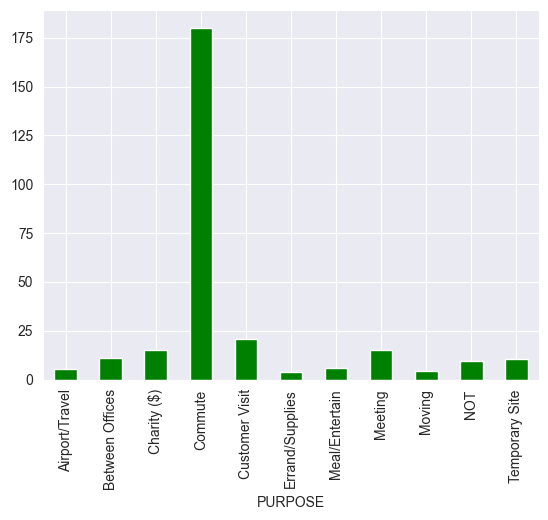

In [20]:
df.groupby('PURPOSE')['MILES'].mean().plot(kind='bar', color='green')

***Most Frequent Purpose: Commute stands out as the dominant reason for travel, with a frequency nearing 175.***

***Other Notable Categories: Categories like Meeting, Meal/Entertainment, and Errand/Supplies show moderate usage.***

***Least Frequent: Purposes such as Charity ($), Moving, and Between Offices have the lowest frequencies.***

#### Which category rides tend to be more ?

<Axes: xlabel='CATEGORY'>

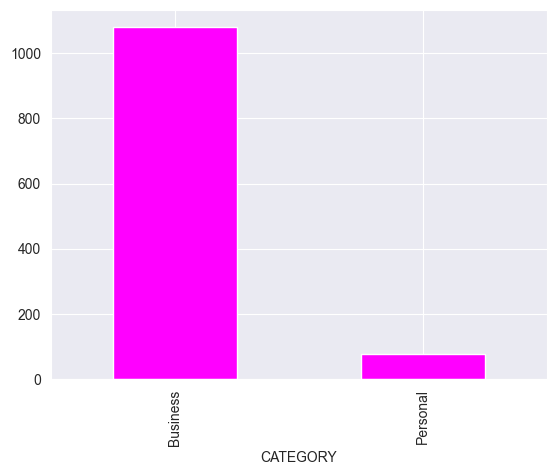

In [21]:
df['CATEGORY'].value_counts().plot(kind='bar', color='magenta')

#### Which week day has more rides ?

In [22]:
df['day_type'] = df['weekday_name'].apply(lambda x: 'WeekEnd' if x in ['Saturday', 'Sunday'] else 'Weekday')

In [23]:
grouped = df.groupby(['PURPOSE', 'day_type']).size().reset_index(name='ride_count')

pivot_df = grouped.pivot(index='PURPOSE', columns='day_type', values='ride_count').fillna(0)
pivot_df

day_type,WeekEnd,Weekday
PURPOSE,,
Airport/Travel,2.0,1.0
Between Offices,6.0,12.0
Charity ($),1.0,0.0
Commute,1.0,0.0
Customer Visit,22.0,79.0
Errand/Supplies,37.0,91.0
Meal/Entertain,44.0,116.0
Meeting,47.0,140.0
Moving,0.0,4.0


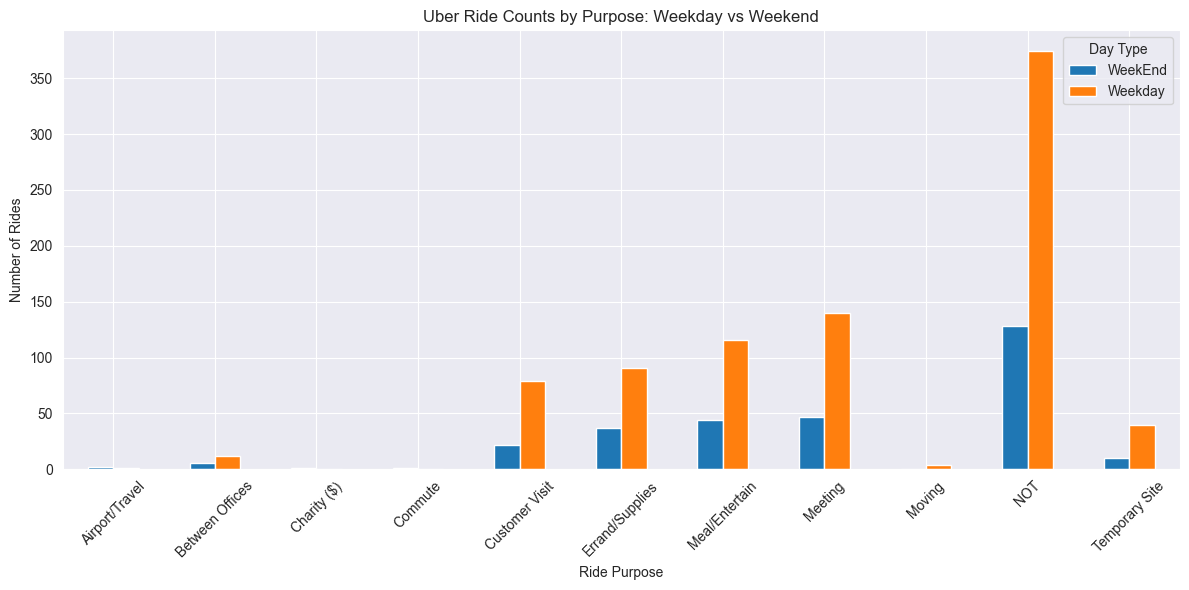

In [24]:
# Plot
pivot_df.plot(kind='bar', figsize=(12, 6))
plt.title('Uber Ride Counts by Purpose: Weekday vs Weekend')
plt.xlabel('Ride Purpose')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()

***Weekday Dominance: Most ride purposes, such as Commute, Meeting, Customer Visit, and Temporary Site, show significantly higher counts on weekdays, indicating strong business-related usage.***

***Weekend Activity: Categories like Meal/Entertainment and Errands/Supplies have relatively higher proportions on weekends, reflecting personal or leisure use.***

***Least Frequent Purposes: Charity ($), Moving, and Between Offices have the lowest ride counts on both weekdays and weekends.***

#### Are there peak hours for Uber usage during the day?

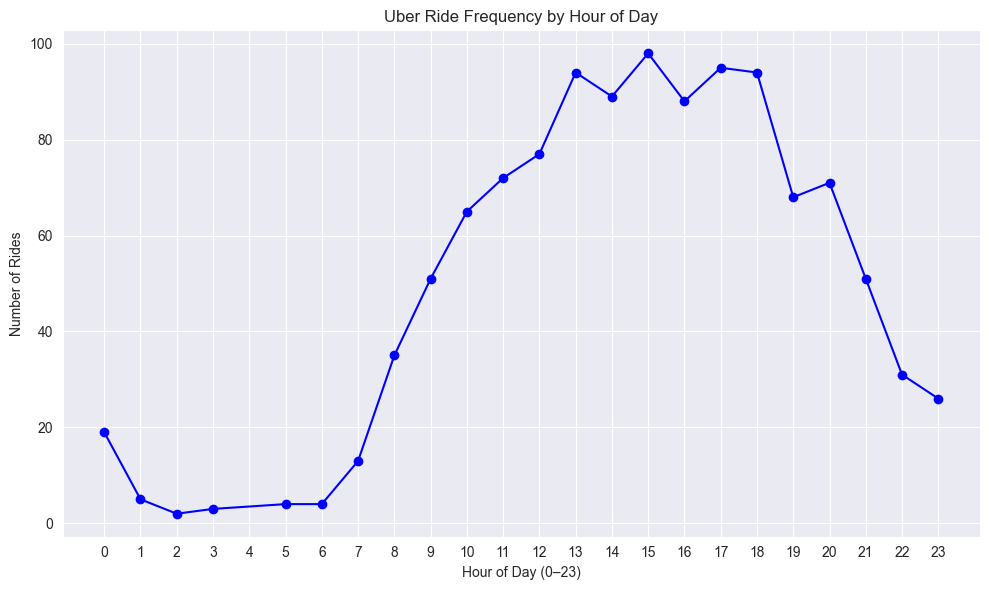

In [25]:
plt.figure(figsize=(10, 6))
df['time'].value_counts().sort_index().plot(kind='line', marker='o', linestyle='-', color='blue')
plt.title('Uber Ride Frequency by Hour of Day')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()

***Uber ride frequency is lowest in the early morning, gradually increases through the day, and peaks between 2 PM and 5 PM, before declining again toward midnight. This indicates the highest demand occurs in the afternoon hours.***